# Avaliação Final

## Aprendizado Dinâmico

Profa. **Cibele Russo**

**MBA em Ciências de Dados**

**Atenção: Você deve resolver as questões neste notebook e submetê-lo inteiramente executado no moodle.**

O arquivo de dados **Qualidadedoar.csv** contém dados de qualidade do ar registradas diariamente na Estação Meteorológica da Mooca em São Paulo SP, no período de 01/01/2017 e 31/12/2017, considerando somente a primeira medida do dia do poluente monóxido de carbono (CO).

Fonte: Dados adaptados de Instituto de Energia e Meio Ambiente (https://energiaeambiente.org.br/qualidadedoar/).

1. Faça a leitura dos dados como indicado abaixo, estabeleça um índice por datas. Caso haja dados faltantes para o valor de CO, complete os dados como sugerido. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê? Avalie a estacionariedade utilizando um teste estatístico.


2. Proponha uma decomposição dos dados de monóxido de carbono em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos.


3. Divida a série de monóxido de carbono registradas em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos?


4. Utilizando a base de treinamento de monóxido de carbono registrado, obtenha:

    - As previsões de Holt-Winters.
    
    - As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).
    
    - As previsões com o método Theta usual.
        

5. Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos três métodos.



A entrega deve ser feita com um notebook .ipynb, com os códigos usados para a obtenção dos resultados e comentários sobre os resultados em células de texto. Este notebook deve ser comentado de forma a facilmente identificar os códigos de cada análise.

Atenção, se constatado plágio, a questão será zerada.


#### Boa prova!

## Item 1


Faça a leitura dos dados como indicado abaixo, estabeleça um índice por datas. Caso haja dados faltantes para o valor de CO, complete os dados como sugerido. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê? Avalie a estacionariedade utilizando um teste estatístico.


(Adicione quantas células precisar para as análises e conclusões de cada item)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [12,6]

caminho = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/Qualidadedoar.csv'

# Leitura dos dados de Qualidade do ar
df = pd.read_csv(caminho, index_col=0, parse_dates=True)

df.head()

,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Data.1
Data,,,,,,,
2017-01-01,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-01
2017-01-02,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-02
2017-01-04,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-04
2017-01-05,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-05
2017-01-06,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-06


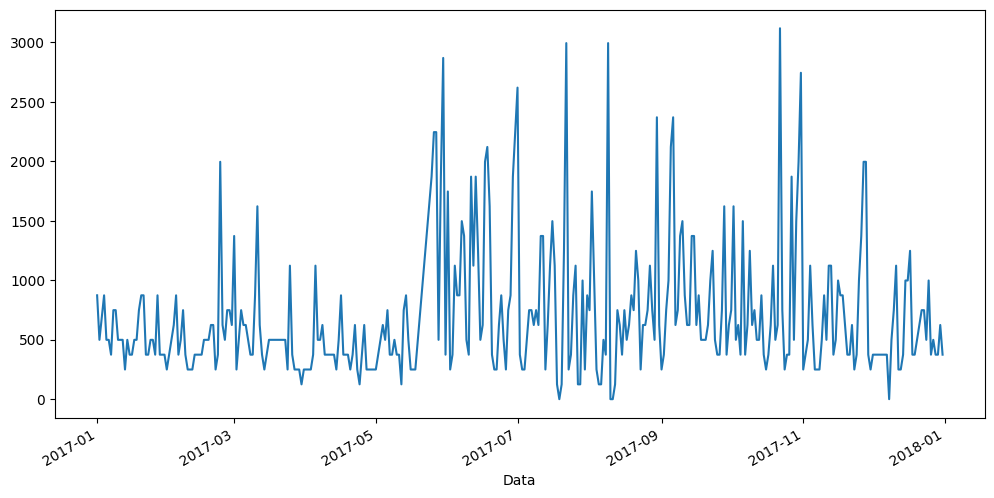

In [3]:
df['Valor'].plot();

In [4]:
df.head()

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(idx)
df.fillna(method='ffill', inplace=True)

C:\Users\feh_s\AppData\Local\Temp\ipykernel_17816\2017115598.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


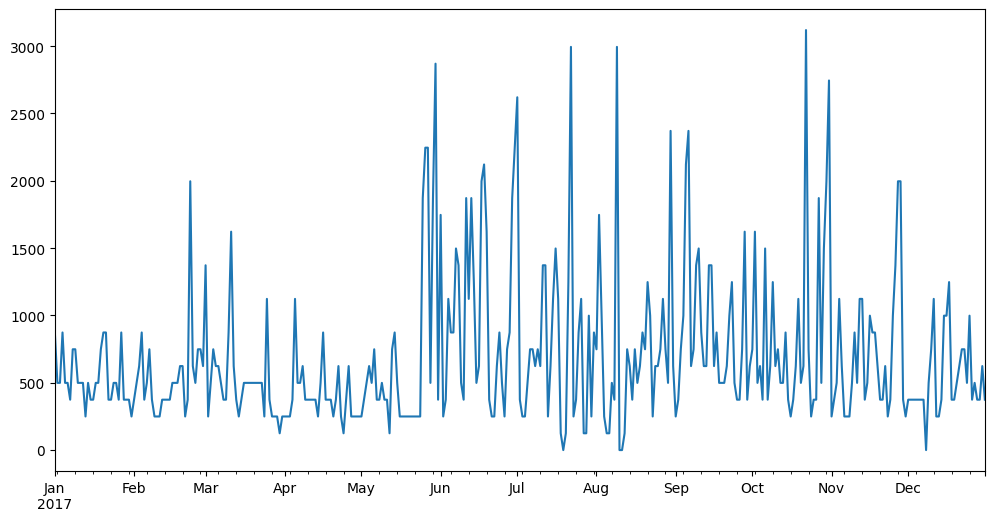

In [5]:
df['Valor'].plot();

In [6]:
from statsmodels.tsa.stattools import adfuller


A série é estacionária, pois o p-value é igual a 0. O que indica que a série é estacionária pelo teste de Dickey-Fulley

In [7]:
result = adfuller(df['Valor'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -13.753778
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


## Item 2

Proponha uma decomposição dos dados de monóxido de carbono em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos.



In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

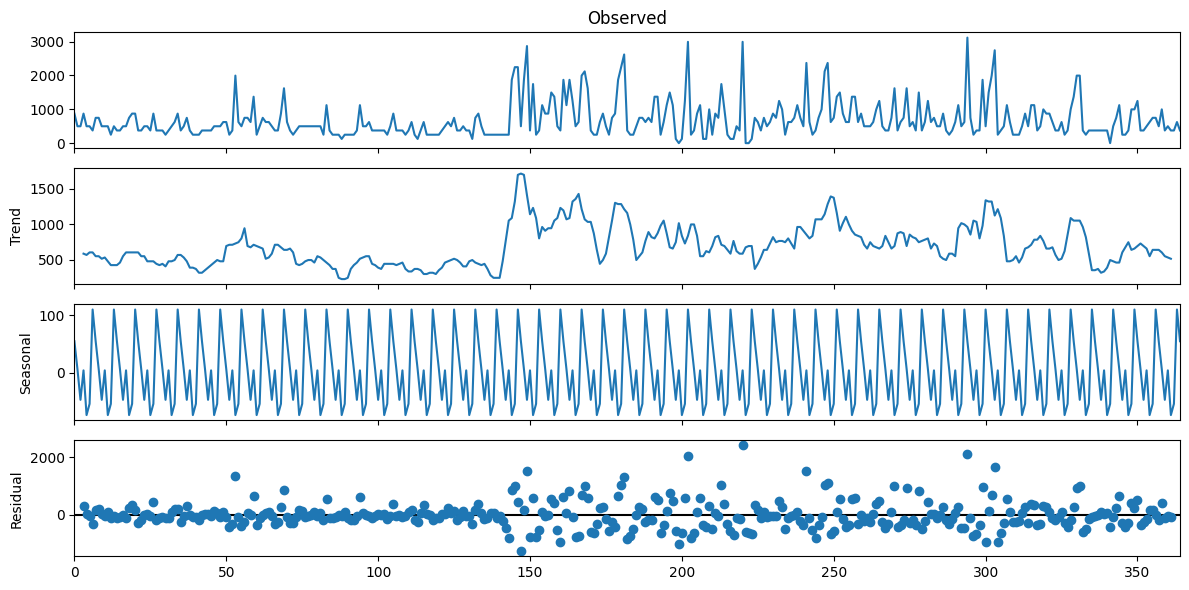

In [9]:
valor = np.array(df['Valor'])

# Decompor a série temporal
decomposicao = seasonal_decompose(valor, model='additive', period=7)

# Plotar os componentes
decomposicao.plot()
plt.show()


- **Tendência**:
   - A linha de tendência não mostra uma linha clara. Tendência irregular

- **Sazonalidade**:
   - Podemos ver que o componente sazonal captura os padrões repetitivos e periódicos dos dados. Mostra que há um ciclo regular que se repetem em intervalos específicos, indicando a presença de sazonalidade na série.

- **Resíduos**:
   - Os resíduos representam a parte dos dados que não é explicada pela tendência ou sazonalidade. Idealmente, os resíduos devem parecer ruído aleatório, sem padrões discerníveis, o que sugere que a decomposição capturou bem a tendência e a sazonalidade. 
   - Estimativa do erro
   - Multiplicativa é melhor pq os resíduos estão variando muito

   Neste código, adicionei 1e-6 (um valor muito pequeno) a todos os elementos da série valor para evitar zeros e negativos. Isso deve permitir que você utilize o modelo multiplicativo sem encontrar o erro.

Se precisar de mais alguma coisa, estou aqui para ajudar!


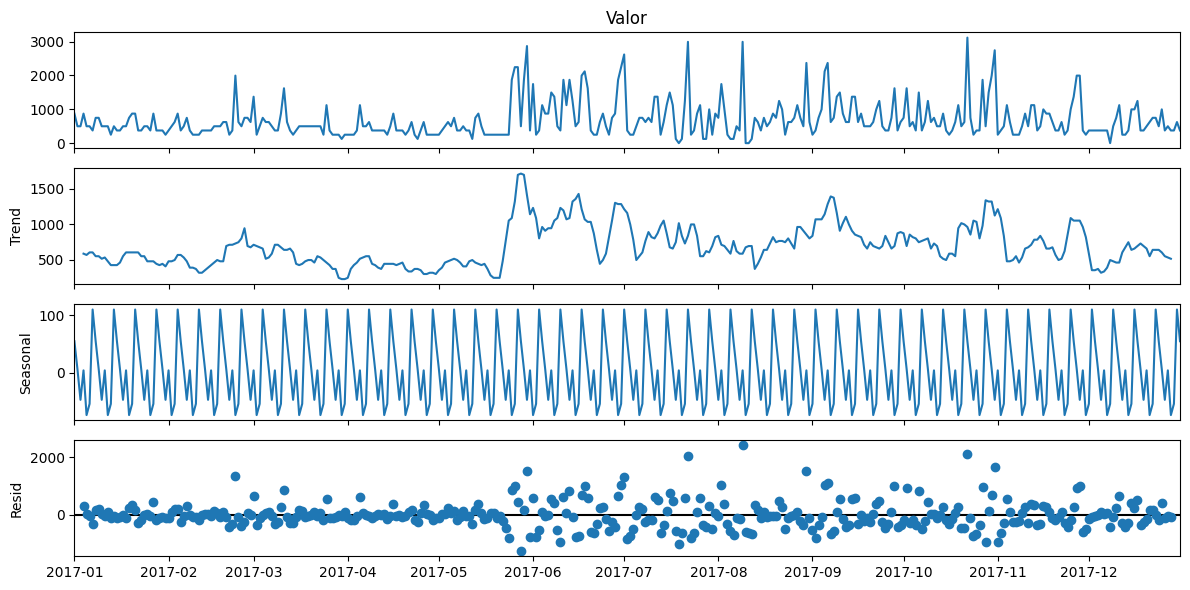

In [10]:
# Decompor a série temporal
decomposicao = seasonal_decompose(df['Valor'], model='adictive', period=7)

# Plotar os componentes
decomposicao.plot()
plt.show()

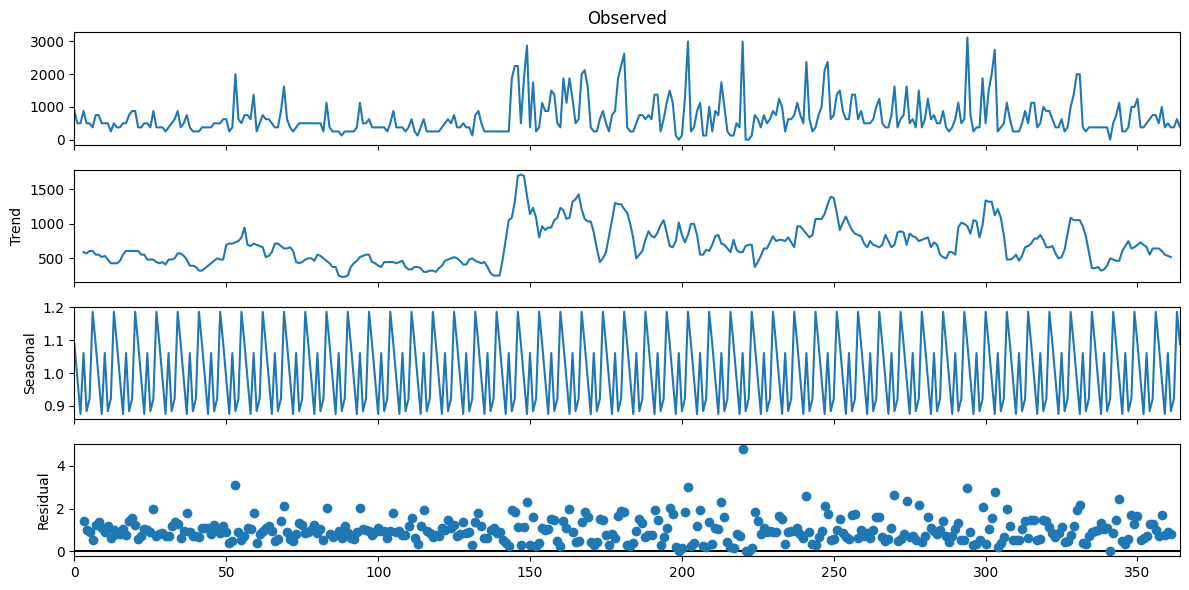

In [11]:
valor = np.array(df['Valor'])

# Adicionar um pequeno valor constante para evitar zeros e negativos
valor_ajustado = valor + 1e-6

# Decompor a série temporal usando o modelo multiplicativo
decomposicao = seasonal_decompose(valor_ajustado, model='multiplicative', period=7)

# Plotar os componentes
decomposicao.plot()
plt.show()

## Item 3

Divida a série de monóxido de carbono registradas em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos?


In [44]:
treino = df.iloc[:-30]
teste = df.iloc[-30:]

In [45]:
len(treino), len(teste)

(335, 30)

Separar os conjuntos em treino e teste ajuda de várias formas. As razões mais importantes são:
- Avaliação do modelo. Medir a performance real
- Evitar overfitting. Avaliando sua capacidade de generalização
- Utilizar validação cruzada
- Ajuste de hiperparâmetroe
- Testar o modelo

## Item 4

Utilizando a base de treinamento de monóxido de carbono registrado, obtenha:

    - As previsões de Holt-Winters.
    
    - As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).
    
    - As previsões com o método Theta usual.
    
    - As previsões com um modelo de redes dinâmicas LSTM.
        

        

   

### As previsões de Holt-Winters

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [67]:
ajustado_HW = ExponentialSmoothing(treino['Valor'],trend='add',seasonal='add',seasonal_periods=7).fit()
predito_HW = ajustado_HW.forecast(30).rename('Previsão Holt-Winters')


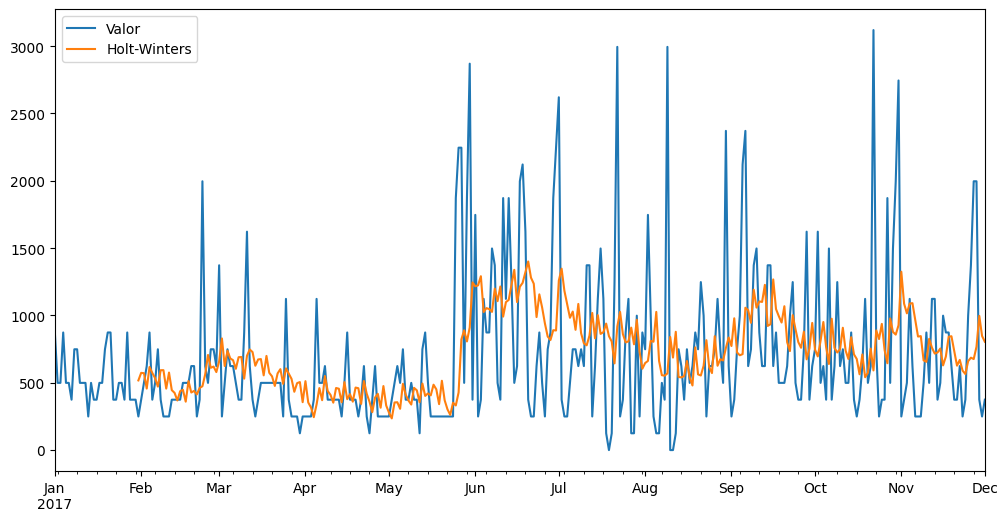

In [68]:
treino[['Valor', 'Holt-Winters']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

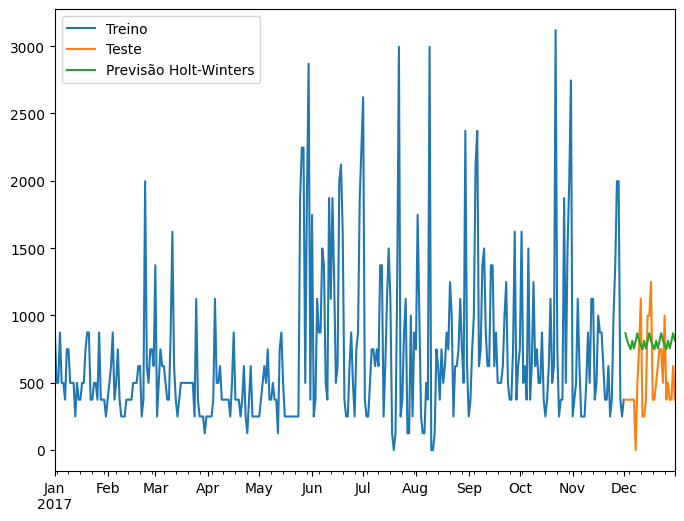

In [69]:
treino['Valor'].plot(legend=True,label='Treino')
teste['Valor'].plot(legend=True,label='Teste',figsize=(8,6));
predito_HW.plot(legend=True,label='Previsão Holt-Winters');

### As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).

In [72]:
# Funções específicas para a modelagem e previsão
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

import pmdarima as pm

In [75]:
# Novo comando para auto_arima a partir de pm (pmdarima)
stepwise_fit = pm.auto_arima(treino['Valor'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=0,
                          seasonal=False,
                          d=0, trace=True,
                          error_action='ignore',   # se uma ordem não funcionar, ignorar
                          suppress_warnings=True,  # ignorar avisos
                          stepwise=True)           # executa stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5509.147, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5253.896, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5360.116, Time=0.88 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5242.022, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5225.716, Time=0.69 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=5208.200, Time=0.12 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=5197.259, Time=0.11 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=5193.661, Time=0.13 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=5165.114, Time=0.55 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=5163.332, Time=0.50 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=5161.421, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5160.228, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5162.205, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5162.254, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -2575.114
Date:                Sat, 14 Sep 2024   AIC                           5160.228
Time:                        18:11:01   BIC                           5179.298
Sample:                    01-01-2017   HQIC                          5167.831
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2654      0.038     33.102      0.000       1.191       1.340
ar.L2         -0.3828      0.065     -5.867      0.000      -0.511      -0.255
ar.L3          0.1166      0.049      2.372      0.018       0.020       0.213
ma.L1         -0.9534      0.018    -53.760      0.000      -0.988      -0.919
sigma2      2.756e+05   1.56e+04     17.683      0.000    2.45e+05    3.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               312.28
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               4.01   Skew:                             1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Para o modelo ARIMA selecionado pelo auto_arima, a saída fornecida indica que o melhor modelo é um SARIMAX(0, 1, 2). Vamos identificar a natureza das componentes desse modelo:

Componente de Autorregressão (AR): O modelo não possui componentes autorregressivas não-sazonais, pois a ordem AR é 0.
Componente de Integração (I): O modelo possui uma componente de diferenciação não-sazonal de ordem 1, o que significa que a série foi diferenciada uma vez para torná-la estacionária.
Componente de Médias Móveis (MA): O modelo possui duas componentes de médias móveis não-sazonais de ordem 2, indicadas pelos coeficientes ma.L1 e ma.L2.
Portanto, o modelo pode ser descrito como:

O modelo possui uma componente de diferenciação não-sazonal de ordem 1.
O modelo possui componentes de médias móveis não-sazonais de ordem 2.
Se precisar de mais alguma coisa ou tiver dúvidas adicionais, estou aqui para ajudar!

In [91]:
import warnings
warnings.filterwarnings("ignore")

modelo = ARIMA(endog=treino['Valor'],order=(3,0,1))
resultados = modelo.fit()
fcast = resultados.predict(len(treino),len(treino)+30,typ='levels').rename('Previsões ARIMA(0,1,0) ')
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Valor   No. Observations:                  335
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -2572.174
Date:                Sat, 14 Sep 2024   AIC                           5156.349
Time:                        18:47:09   BIC                           5179.234
Sample:                    01-01-2017   HQIC                          5165.472
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        703.7603    141.963      4.957      0.000     425.518     982.003
ar.L1          1.2252      0.052     23.677      0.000       1.124       1.327
ar.L2         -0.3721      0.066     -5.628      0.000      -0.502      -0.243
ar.L3          0.1214      0.051      2.388      0.017       0.022       0.221
ma.L1         -0.9219      0.039    -23.526      0.000      -0.999      -0.845
sigma2      2.731e+05   1.78e+04     15.357      0.000    2.38e+05    3.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               362.14
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                             1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
len(teste)

30

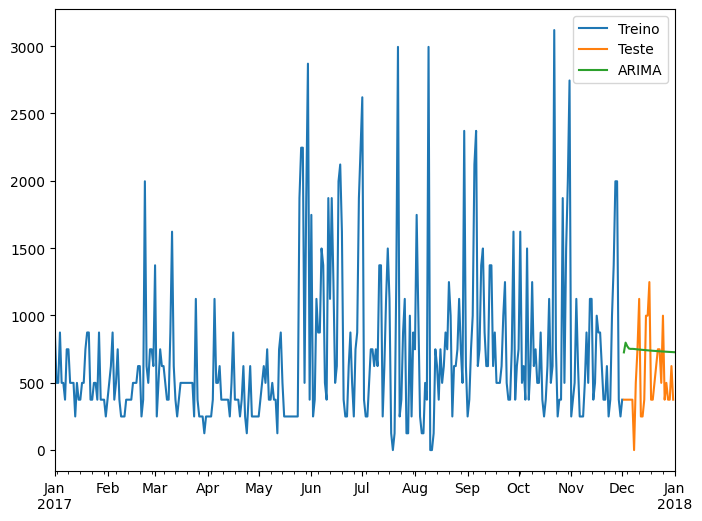

In [93]:
treino['Valor'].plot(legend=True,label='Treino')
teste['Valor'].plot(legend=True,label='Teste',figsize=(8,6));
fcast.plot(legend=True,label='ARIMA');

### As previsões com o método Theta usual.

In [94]:
from statsmodels.tsa.forecasting.theta import ThetaModel

In [96]:

res = ThetaModel(treino['Valor'],deseasonalize=True,period=7).fit()
fcast = res.forecast(30)

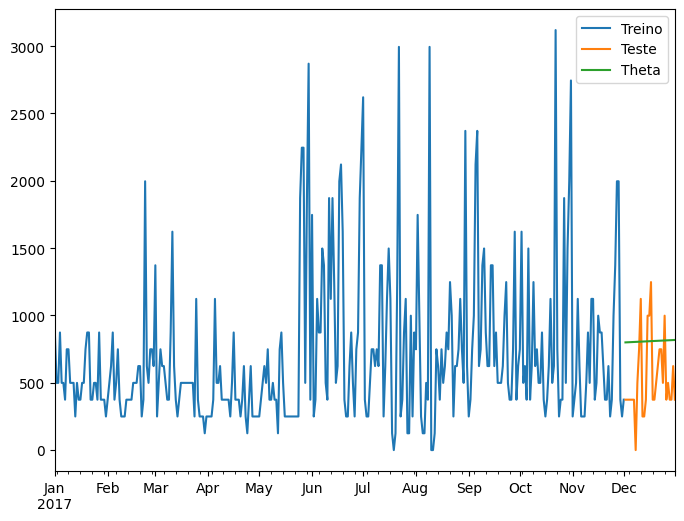

In [97]:
treino['Valor'].plot(legend=True,label='Treino')
teste['Valor'].plot(legend=True,label='Teste',figsize=(8,6));
fcast.plot(legend=True,label='Theta');

### As previsões com um modelo de redes dinâmicas LSTM.

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler


In [106]:
scaler = MinMaxScaler()

In [109]:
# Ajustar o scaler aos dados de treino
scaler.fit(treino['Valor'].values.reshape(-1, 1))

# Transformar os dados de treino e teste
scaled_train = scaler.transform(treino['Valor'].values.reshape(-1, 1))
scaled_test = scaler.transform(teste['Valor'].values.reshape(-1, 1))

In [110]:
n_input = 7

In [111]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [112]:
X,y = generator[0]

In [113]:
# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(generator,epochs=250)

Epoch 1/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0358
Epoch 2/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0323
Epoch 3/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0291
Epoch 4/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0289
Epoch 5/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0257
Epoch 6/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0309
Epoch 7/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0270
Epoch 8/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0297
Epoch 9/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0335
Epoch 10/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0286
Epoch 11/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0304
Epoch 12/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0280
Epoch 13/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0281
Epoch 14/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0297
Epoch 15/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1

In [117]:
train_predict = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [123]:
# Inverter a normalização para obter os valores originais
train_predict = scaler.inverse_transform(train_predict)
y = scaler.inverse_transform(y)

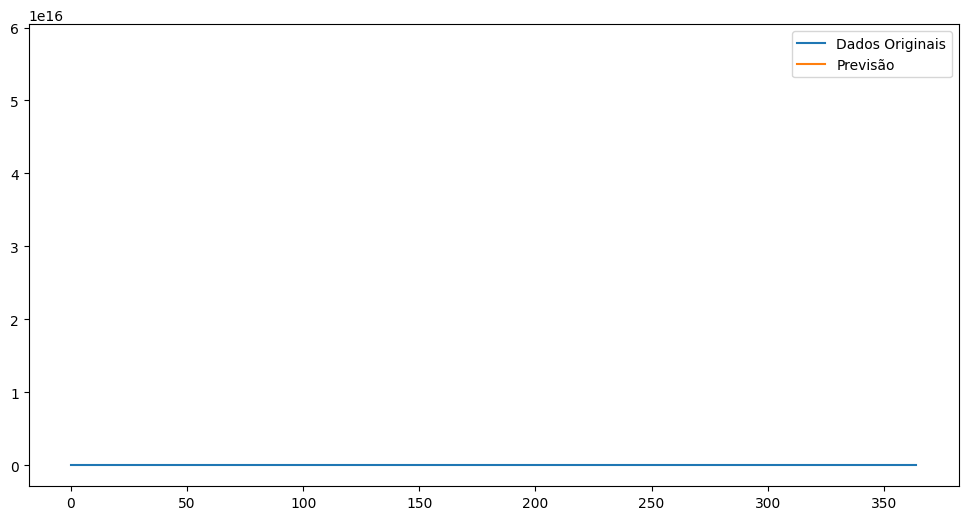

In [124]:
plt.plot(scaler.inverse_transform(df['Valor'].values.reshape(-1, 1)), label='Dados Originais')
plt.plot(train_predict, label='Previsão')
plt.legend()
plt.show()

In [127]:
# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
df['Valor'] = scaler.fit_transform(df['Valor'].values.reshape(-1, 1))

# Preparar os dados para o modelo LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X, Y = create_dataset(df['Valor'].values, look_back)

# Reshape dos dados para [amostras, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinar o modelo
model.fit(X, Y, epochs=20, batch_size=1, verbose=2)

# Fazer previsões
train_predict = model.predict(X)

# Inverter a normalização para obter os valores originais
train_predict = scaler.inverse_transform(train_predict)
Y = scaler.inverse_transform([Y])

# Plotar os resultados
import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(df['Valor'].values.reshape(-1, 1)), label='Dados Originais')
plt.plot(train_predict, label='Previsão')
plt.legend()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [114]:
true_predictions = scaler.inverse_transform(test_predictions)

NameError: name 'test_predictions' is not defined

In [ ]:
look_back = 10



# Treinar o modelo
model.fit(generator, epochs=20, batch_size=1, verbose=2)

# Fazer previsões
train_predict = model.predict(X)

# Inverter a normalização para obter os valores originais
train_predict = scaler.inverse_transform(train_predict)
Y = scaler.inverse_transform([Y])

# Plotar os resultados
import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(df['Valor'].values.reshape(-1, 1)), label='Dados Originais')
plt.plot(train_predict, label='Previsão')
plt.legend()
plt.show()


## Item 5

Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos quatro métodos.